# Titanic — Exploratory Data Analysis (EDA)

**Task:** Perform EDA on the Titanic dataset (train.csv).  
**Tools:** pandas, numpy, matplotlib, seaborn.  

**Deliverables:**  
- Jupyter Notebook with code, plots, and observations.  
- PDF report with the same content for submission.

Dataset source: `train.csv` (use the uploaded file).


In [7]:
# Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", palette="muted")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


In [8]:
# Load data
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [11]:
# Quick peek
display(df.head())
display(df.info())
display(df.describe(include='all').T)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Initial Observations
- Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.
- Target column: **Survived** (0 = did not survive, 1 = survived).
- Missing values likely in **Age**, **Cabin**, and maybe **Embarked**.
- Will handle missing values, engineer a few features, then visualize.

In [12]:
# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Cabin       687
Age         177
Embarked      2
dtype: int64

## Plan
1. Handle missing values (Age, Embarked, Cabin).  
2. Feature engineering: Title from Name, FamilySize, IsAlone, AgeGroup.  
3. Univariate analysis (distributions).  
4. Bivariate analysis (Survived vs features).  
5. Correlation and multivariate checks.  
6. Summary of insights and interview Q&A.

In [14]:
# Create a copy to work on
data = df.copy()

# 1) Extract Title from Name
data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

# Simplify titles
title_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Royal', 'Countess': 'Royal', 'Dona': 'Royal', 'Sir': 'Royal', 'Don': 'Royal',
    'Jonkheer': 'Royal', 'Col': 'Officer', 'Major': 'Officer', 'Capt': 'Officer', 'Dr': 'Officer',
    'Rev': 'Officer'
}
data['Title'] = data['Title'].replace(title_map)

# Replace rare titles
rare_titles = data['Title'].value_counts()[data['Title'].value_counts() < 10].index
data['Title'] = data['Title'].replace(rare_titles, 'Other')

# 2) Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 3) IsAlone
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# 4) Fill Embarked with mode (no chained assignment to avoid warnings)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# 5) Fill Age: use median by Title (better than global)
data['Age'] = data['Age'].fillna(
    data.groupby('Title')['Age'].transform('median')
)

# 6) Cabin: create HasCabin flag (many missing values so drop original Cabin)
data['HasCabin'] = (~data['Cabin'].isnull()).astype(int)
data = data.drop('Cabin', axis=1)

# 7) Fare: check and fill if needed
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# 8) Convert categorical columns to category dtype for nicer displays
for col in ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'HasCabin']:
    data[col] = data[col].astype('category')

# Show resulting columns and missing
display(data.info())
display(data.isnull().sum()[data.isnull().sum() > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Title        891 non-null    category
 12  FamilySize   891 non-null    int64   
 13  IsAlone      891 non-null    category
 14  HasCabin     891 non-null    category
dtypes: category(6), float64(2), int64(5), object(2)
memory usage: 68.8+ KB


None

Series([], dtype: int64)

**Feature engineering notes:**
- `Title` captures social status (Mrs, Miss, Mr, Officer, Other).
- `FamilySize` and `IsAlone` can show the impact of family on survival.
- `HasCabin` as a proxy for deck/class (Cabin presence often correlates with higher class).
- Age filled per Title to better approximate missing ages.

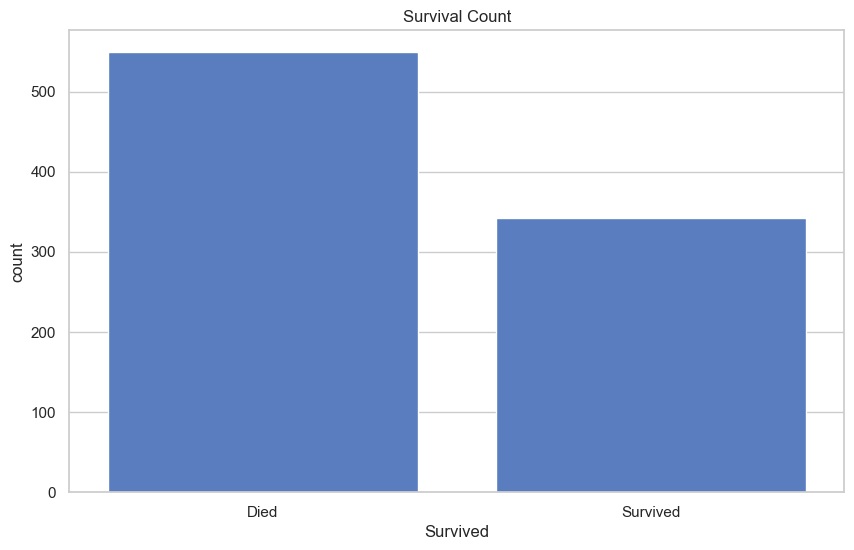

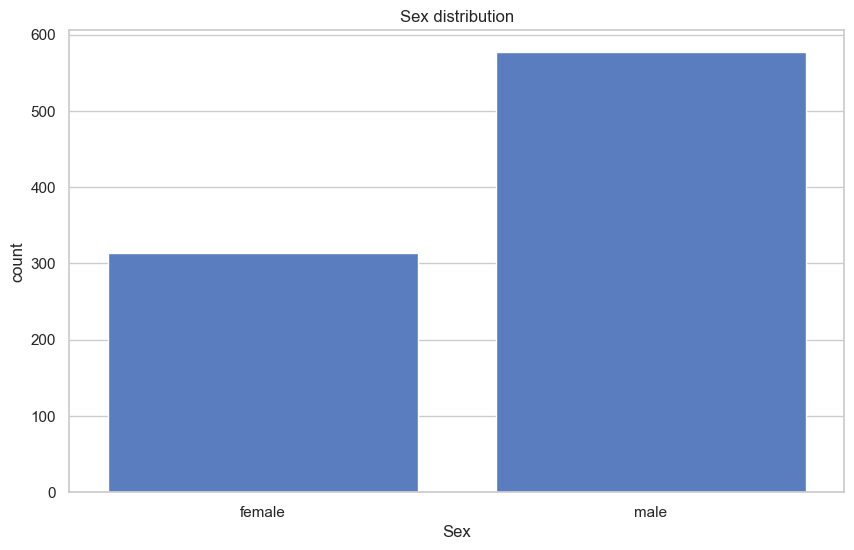

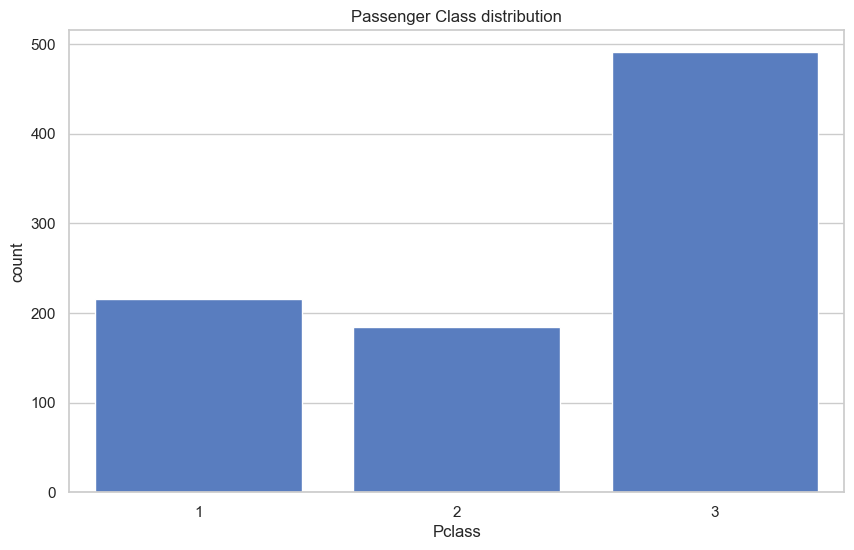

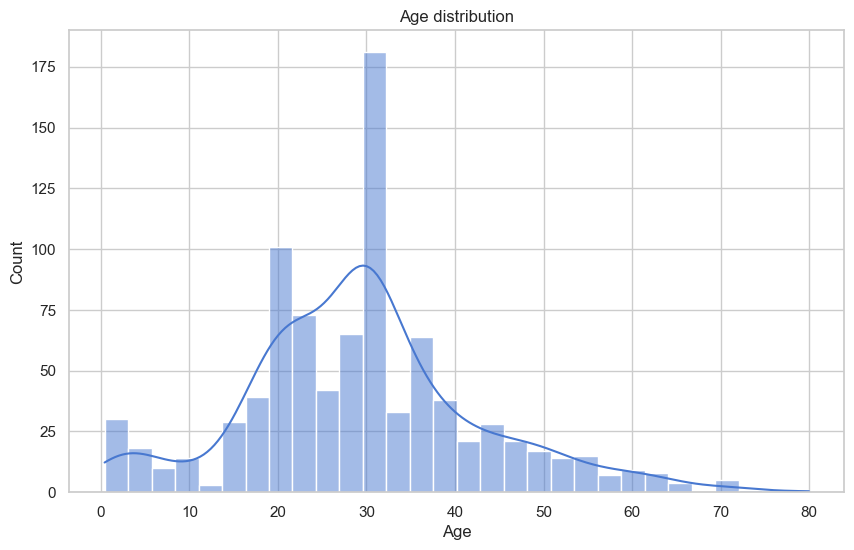

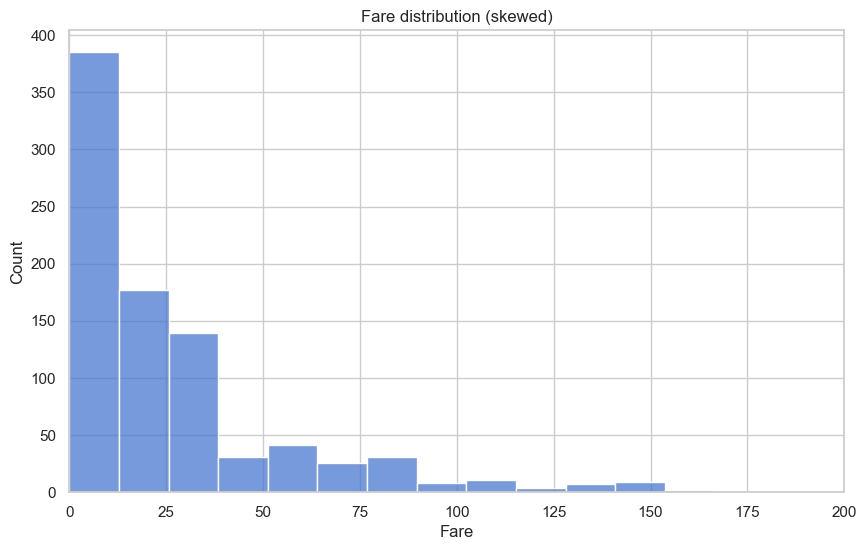

In [15]:
# 1. Survival counts
plt.figure()
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xticks([0,1], ['Died','Survived'])
plt.show()

# 2. Sex distribution
plt.figure()
sns.countplot(x='Sex', data=data)
plt.title('Sex distribution')
plt.show()

# 3. Pclass distribution
plt.figure()
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class distribution')
plt.show()

# 4. Age histogram
plt.figure()
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

# 5. Fare distribution (skewed)
plt.figure()
sns.histplot(data['Fare'], bins=40)
plt.title('Fare distribution (skewed)')
plt.xlim(0, 200)
plt.show()

**Univariate Observations**
- More passengers did not survive than survived.  
- Fewer passengers are in 1st class; majority in 3rd class.  
- Age distribution is roughly right-skewed; many young passengers.  
- Fare is heavily right-skewed (some very high fares).

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


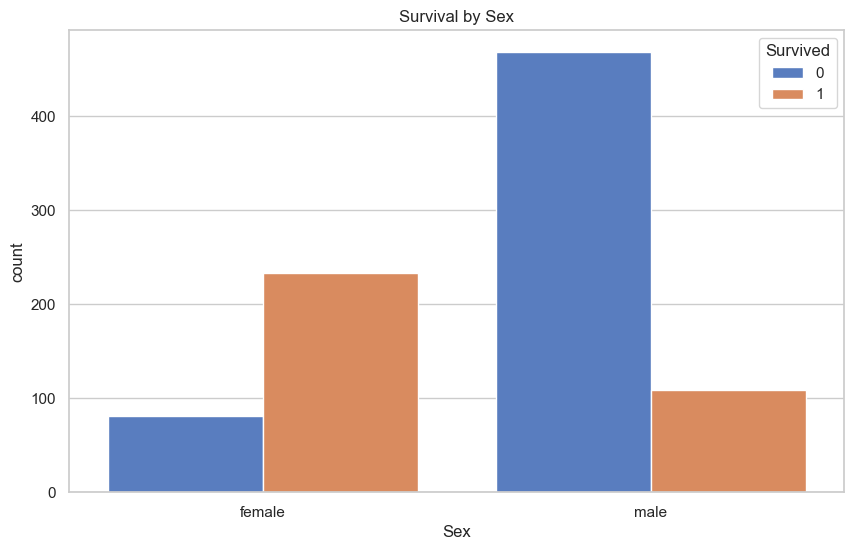

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


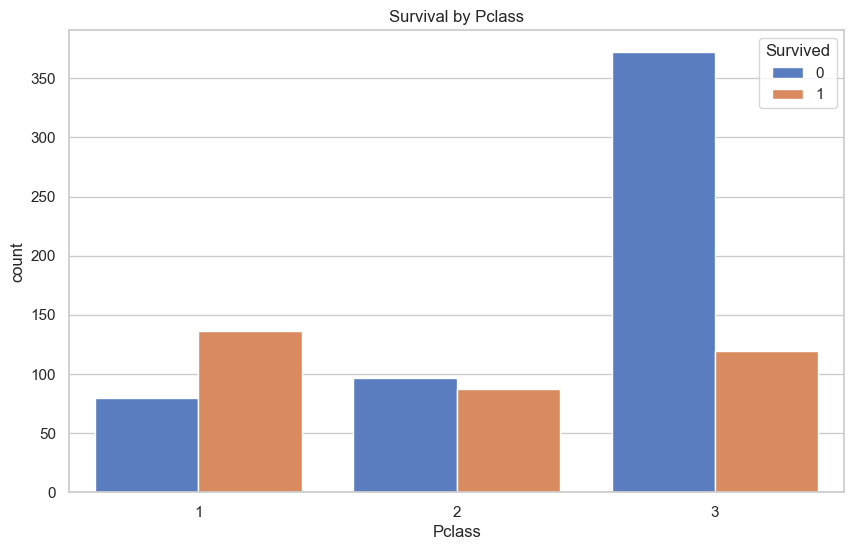

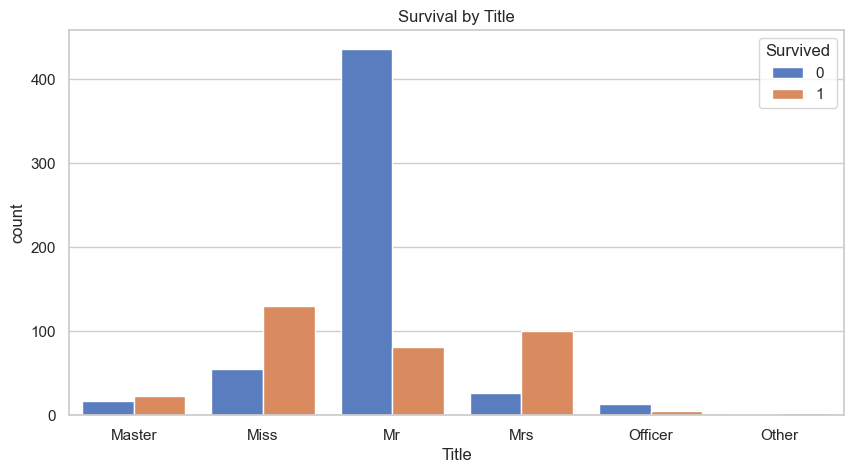

In [16]:
# Survival rate by Sex
display(pd.crosstab(data['Sex'], data['Survived'], normalize='index') * 100)

# Plot
plt.figure()
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.show()

# Survival by Pclass
display(pd.crosstab(data['Pclass'], data['Survived'], normalize='index') * 100)
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Pclass')
plt.show()

# Survival by Title
plt.figure(figsize=(10,5))
sns.countplot(x='Title', hue='Survived', data=data)
plt.title('Survival by Title')
plt.show()

**Bivariate Observations (categorical)**
- **Sex:** Females have a much higher survival rate than males.  
- **Pclass:** 1st class passengers survived at a higher rate than 3rd class.  
- **Title:** Higher-status titles (Mrs, Miss) show different survival patterns — useful for modeling.

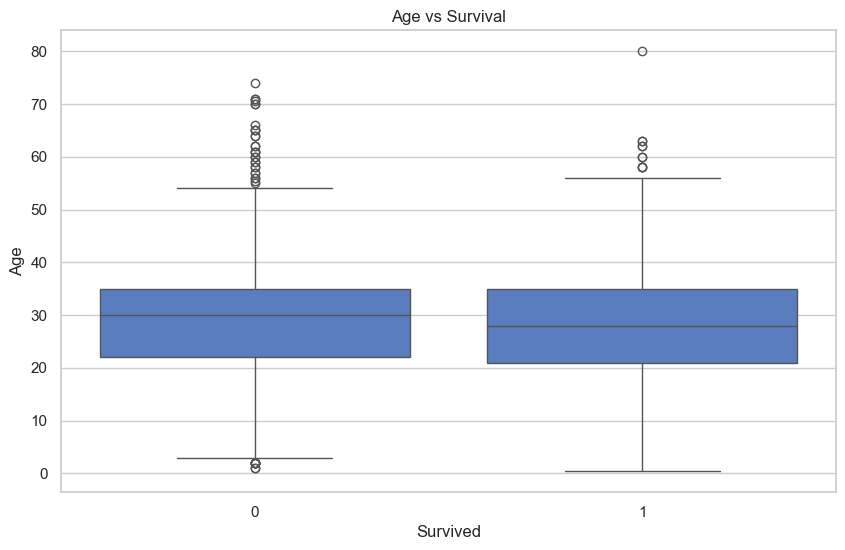

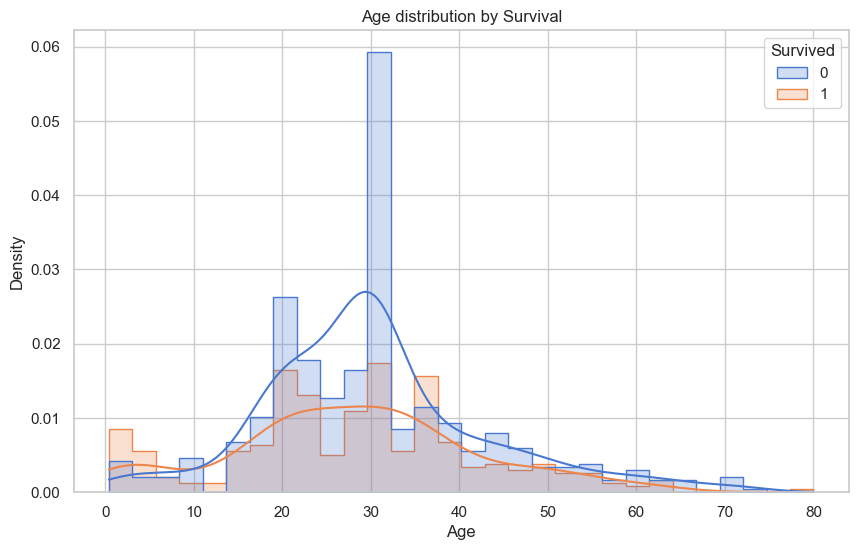

In [17]:
# Boxplot Age vs Survived
plt.figure()
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survival')
plt.show()

# Age distribution by Survived
plt.figure()
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, element="step", stat="density")
plt.title('Age distribution by Survival')
plt.show()

**Age Observations**
- Children (lower ages) appear to have higher survival densities in some ranges.
- Median age for survivors might be slightly lower than for non-survivors — check numeric stats.

,FamilySize,count,mean,mean_pct
0,1,537,0.303538,30.353818
1,2,161,0.552795,55.279503
2,3,102,0.578431,57.843137
3,4,29,0.724138,72.413793
4,5,15,0.200000,20.000000
5,6,22,0.136364,13.636364
6,7,12,0.333333,33.333333
7,8,6,0.000000,0.000000
8,11,7,0.000000,0.000000


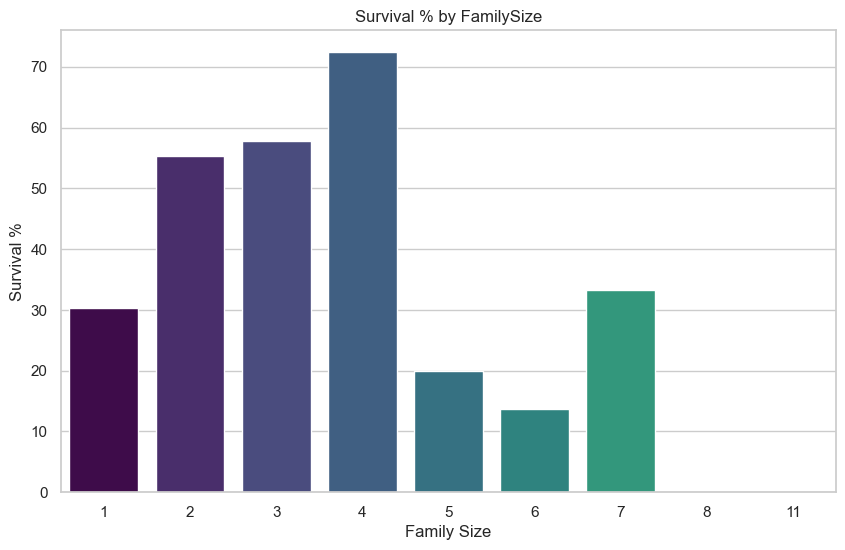

In [20]:
# Group by FamilySize
fs_summary = data.groupby('FamilySize')['Survived'].agg(['count', 'mean']).sort_index()
fs_summary['mean_pct'] = fs_summary['mean'] * 100

# Reset index so FamilySize becomes a column for plotting
fs_summary = fs_summary.reset_index()

# Show table
display(fs_summary)

# Plot FamilySize buckets (future-proof palette usage)
plt.figure()
sns.barplot(
    x='FamilySize', 
    y='mean_pct', 
    hue='FamilySize', 
    data=fs_summary, 
    palette='viridis', 
    legend=False
)
plt.title('Survival % by FamilySize')
plt.ylabel('Survival %')
plt.xlabel('Family Size')
plt.show()


**Family Observations**
- Very small families/alone passengers often have different survival probabilities than moderate family sizes.
- Extremely large families tend to have lower survival rates.


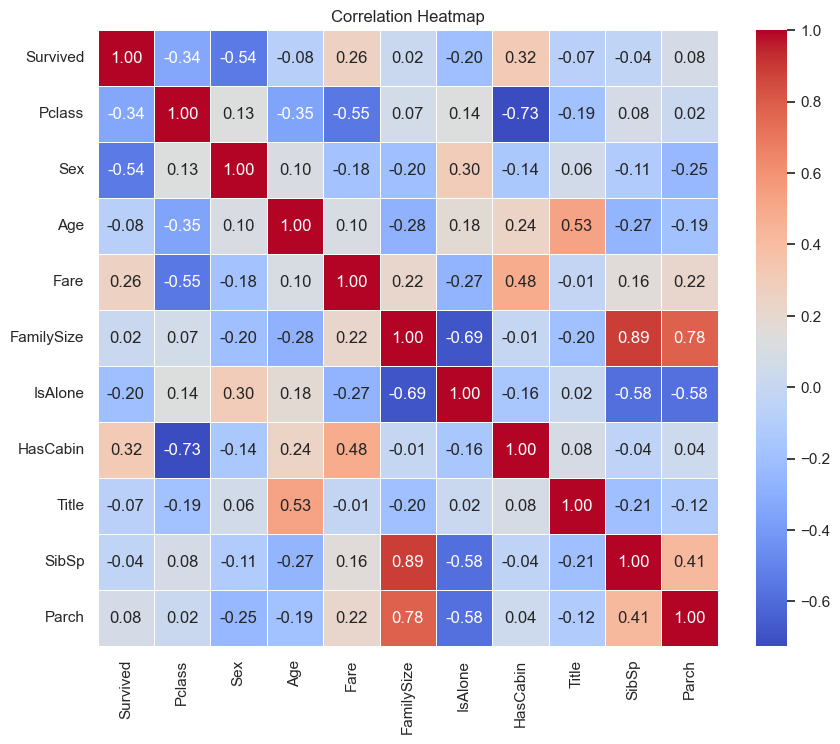

In [21]:
# Prepare numeric dataframe for correlation
corr_df = data.copy()
# Map categories to numbers for correlation
corr_df['Sex'] = corr_df['Sex'].cat.codes
corr_df['Embarked'] = corr_df['Embarked'].cat.codes
corr_df['Title'] = corr_df['Title'].cat.codes
corr_df['Pclass'] = corr_df['Pclass'].astype(int)

# Select columns
cols = ['Survived','Pclass','Sex','Age','Fare','FamilySize','IsAlone','HasCabin','Title','SibSp','Parch']
plt.figure(figsize=(10,8))
sns.heatmap(corr_df[cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Observations**
- `Sex` (encoded) and `Pclass` show moderate correlation with `Survived`.  
- `Fare` correlates with `Pclass` (higher class → higher fare).  
- `HasCabin` has positive correlation with survival (proxy for class).
- `Age` correlation with Survived is weaker but present.


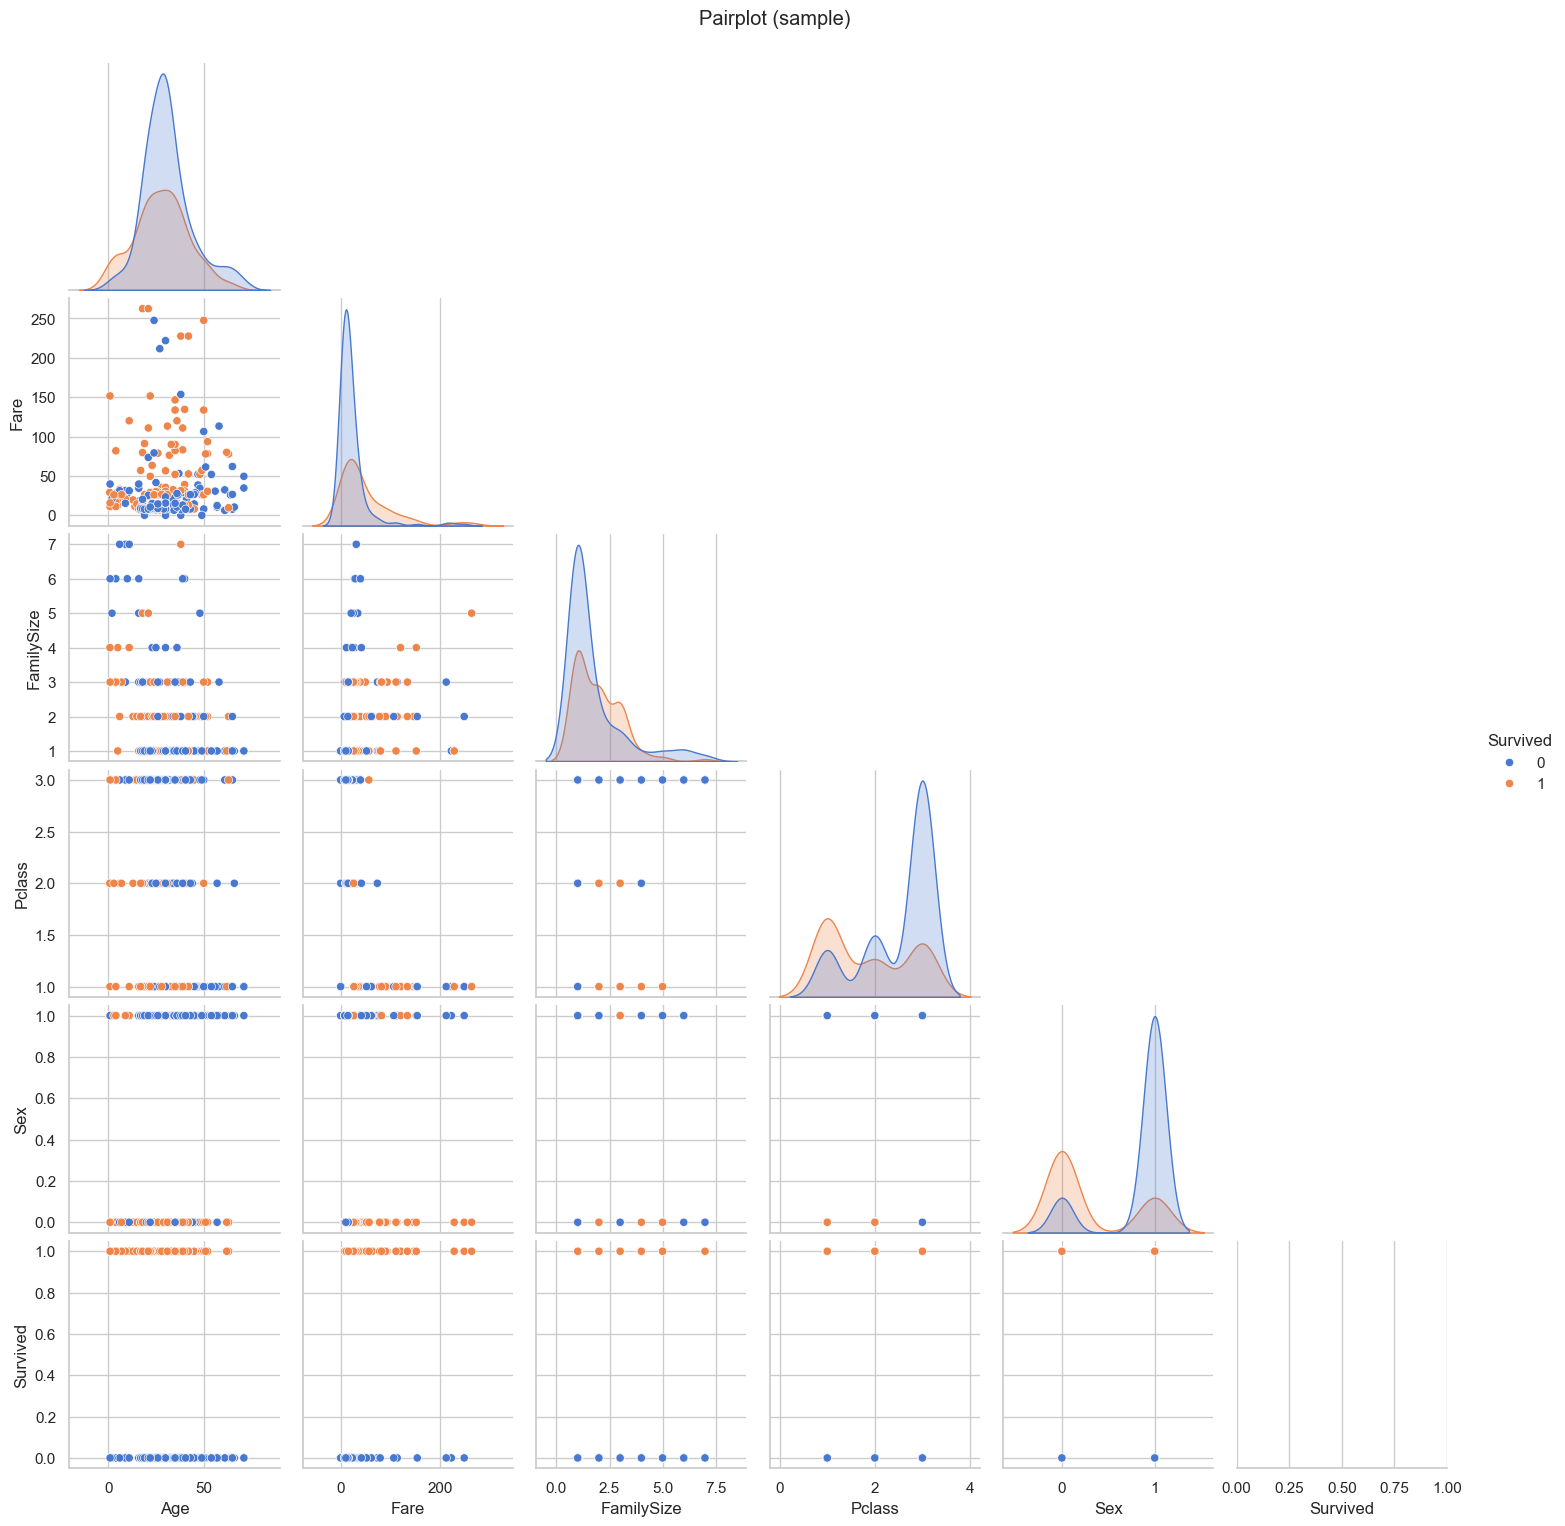

In [23]:
# Pairplot on a sampled subset to avoid long render times
sample = corr_df[cols].sample(300, random_state=42)
sns.pairplot(sample, vars=['Age','Fare','FamilySize','Pclass','Sex','Survived'], hue='Survived', corner=True)
plt.suptitle('Pairplot (sample)', y=1.02)
plt.show()


### Multivariate check: Survival by Sex and Pclass


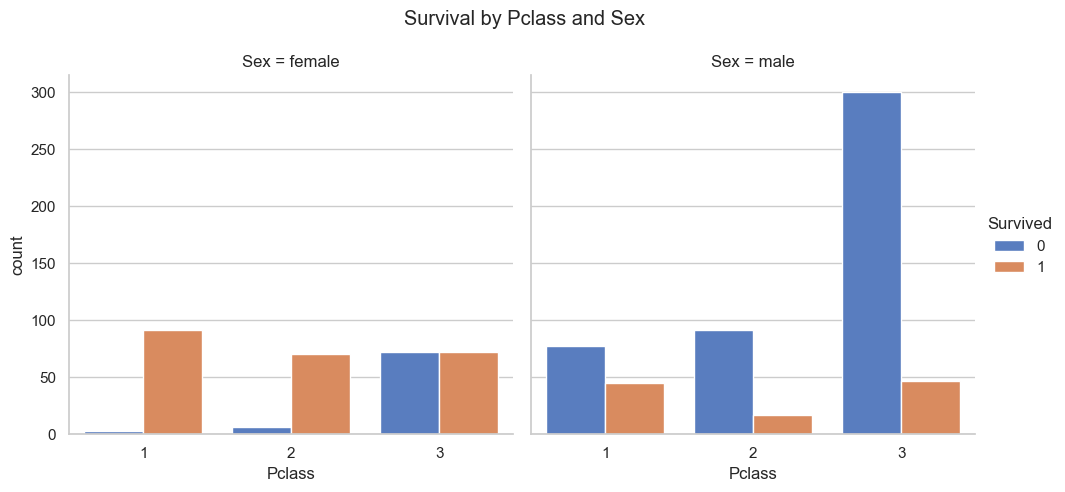

In [24]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=data)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Pclass and Sex')
plt.show()

# Final Summary of Insights

1. **Sex** is one of the strongest predictors: females had a much higher survival rate than males.  
2. **Pclass** (socioeconomic status) strongly influenced survival — 1st class had higher survival than 3rd.  
3. **Fare** and **HasCabin** (proxy for class) positively correlate with survival.  
4. **Children** (lower ages) show a relatively higher chance of survival in some age ranges.  
5. **Family size**: very small families or being alone had mixed effects; moderate family sizes sometimes had better survival percentages than very large families.  
6. Feature engineering (Title, FamilySize, IsAlone, HasCabin) yields useful signals for modeling or deeper analysis.
